In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

# Util Functions

In [14]:
def parse_complex_number(complex_str):
    """Parse a complex number from string."""
    complex_str = complex_str.replace("(", "").replace(")", "")
    real, imag = complex_str.split(",")
    return complex(float(real), float(imag))

def read_complex_array(filename):
    """Read a file with complex numbers and return a numpy array."""
    with open(filename, "r") as file:
        content = file.read()

    # Assuming the complex numbers are separated by spaces
    complex_strings = content.split()
    complex_numbers = [parse_complex_number(num) for num in complex_strings]

    return np.array(complex_numbers, dtype=complex)

def visualize_fft_output(complex_array):
    # Separate real and imaginary parts for plotting
    real_parts = complex_array.real
    imag_parts = complex_array.imag

    # Create a figure and axis for plotting
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Plotting the real part
    axs[0].plot(real_parts, label='Real Part')
    axs[0].set_title('Real Part of FFT Results')
    axs[0].set_xlabel('Sample')
    axs[0].set_ylabel('Amplitude')

    # Plotting the imaginary part
    axs[1].plot(imag_parts, label='Imaginary Part', color='orange')
    axs[1].set_title('Imaginary Part of FFT Results')
    axs[1].set_xlabel('Sample')
    axs[1].set_ylabel('Amplitude')

    # Adjust layout
    plt.tight_layout()
    # Show the plot
    plt.show()
    return

# Execution

In [16]:
subprocess.check_call(
    ['sh', './runFFT.sh', 'custom', 'yes', 'custom_fft_output.txt']
    )

0

In [17]:
subprocess.check_call(
    ['sh', './runFFT.sh', 'fftw', 'yes', 'fftw_output.txt']
    )

0

In [21]:
subprocess.check_call(
    ['sh', './runFFT.sh', 'both', 'yes', 'complete_output.txt']
    )

0

FFTW Library Output


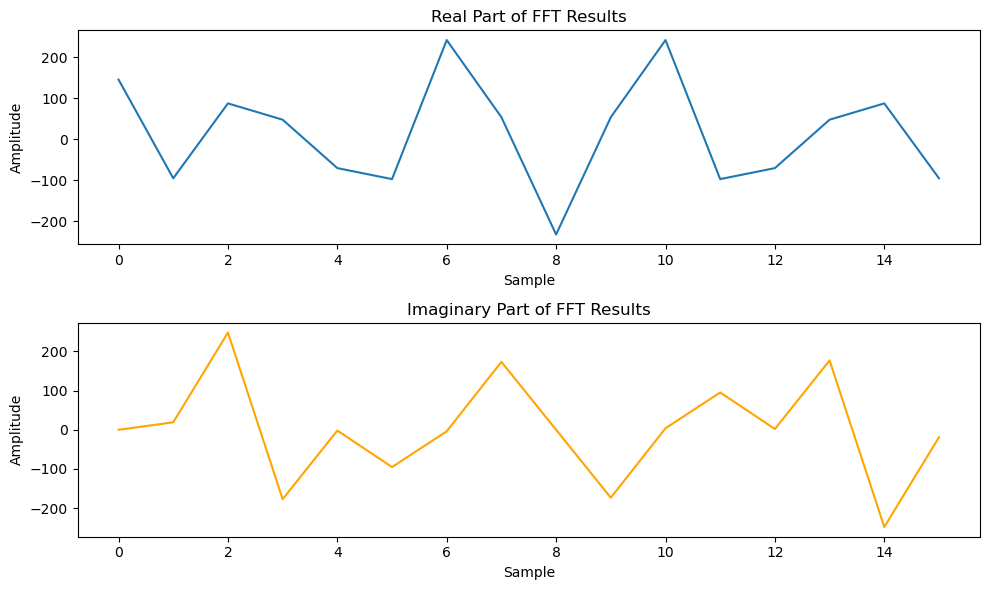

Custom FFT Function Output


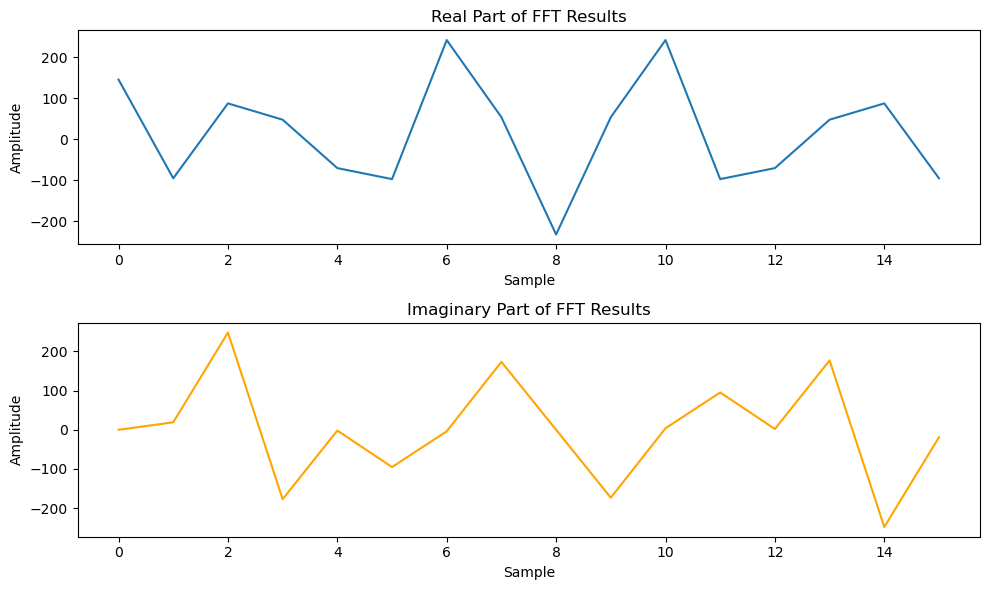

In [24]:
# Example usage
# custom_output_array = read_complex_array('custom_fft_output.txt')
# fftw_output_array = read_complex_array('fftw_output.txt')
complete_output_array = read_complex_array('complete_output.txt')

print("FFTW Library Output")
visualize_fft_output(complete_output_array[:16]) #right now array length hard-coded
print("Custom FFT Function Output")
visualize_fft_output(complete_output_array[16:])